# Итоговое задание №2. Прогнозирование конечных свойств новых материалов (композиционных материалов)
На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов. 

Предсказание (из семинара 22): 
* модуль упругости при растяжении
* прочности при растяжении
* cоотношение матрица-наполнитель

Предсказание (из итогового вебинара 26.11.2022):
* модуль упругости при растяжении
* прочности при растяжении

Загрузка основных библиотек

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Загрузка данных из файлов Excel

In [25]:
df_bp = pd.read_csv('../data/raw/X_bp.csv', sep=';',index_col=0) # Загрузка и создание датафрейма из csv файла
df_nup = pd.read_csv('../data/raw/X_nup.csv', sep=';',index_col=0) # Загрузка и создание датафрейма из csv файла

In [26]:
#pd.DataFrame(df_nup.columns, columns=['характиристики нашивок'])
#pd.DataFrame(df_bp.columns, columns=['характиристики базальтопластика'])
df_bp.shape


(1023, 10)

In [27]:
df_nup.shape

(1040, 3)

Объединение по Inner Join

In [28]:
df = df_bp.merge(df_nup, left_index=True, right_index=True)
df.head()
##pd.DataFrame(df.columns, columns=['характиристики композиционных материалов в объединенном датасете'])

Соотношение матрица-наполнитель Плотность, кг/м3 модуль упругости, ГПа  \
0                     1,857142857             2030           738,7368421   
1                     1,857142857             2030           738,7368421   
2                     1,857142857             2030           738,7368421   
3                     1,857142857             2030           738,7368421   
4                     2,771331058             2030                   753   

  Количество отвердителя, м.% Содержание эпоксидных групп,%_2  \
0                          30                     22,26785714   
1                          50                           23,75   
2                        49,9                              33   
3                         129                           21,25   
4                      111,86                     22,26785714   

  Температура вспышки, С_2 Поверхностная плотность, г/м2  \
0                      100                           210   
1              284,6153846                           210   
2              284,6153846                           210   
3                      300                           210   
4              284,6153846                           210   

  Модуль упругости при растяжении, ГПа Прочность при растяжении, МПа  \
0                                   70                          3000   
1                                   70                          3000   
2                                   70                          3000   
3                                   70                          3000   
4                                   70                          3000   

  Потребление смолы, г/м2  Угол нашивки, град Шаг нашивки Плотность нашивки  
0                     220                   0           4                57  
1                     220                   0           4                60  
2                     220                   0           4                70  
3                     220                   0           5                47  
4                     220                   0           5                57

In [29]:
#join_dataFrame = df_bp.join(df_nup, how='inner')
#join_dataFrame.shape
#pd.DataFrame(join_dataFrame.columns, columns=['характиристики композиционных материалов в join_dataFrame'])

## Анализ датасета

Посмотрим размерность объединенного датасета

In [30]:
df.shape

(1023, 13)

Проверим на пустые элементы

In [31]:
df.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Проверяем типы данных

In [32]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Соотношение матрица-наполнитель       1023 non-null   object
 1   Плотность, кг/м3                      1023 non-null   object
 2   модуль упругости, ГПа                 1023 non-null   object
 3   Количество отвердителя, м.%           1023 non-null   object
 4   Содержание эпоксидных групп,%_2       1023 non-null   object
 5   Температура вспышки, С_2              1023 non-null   object
 6   Поверхностная плотность, г/м2         1023 non-null   object
 7   Модуль упругости при растяжении, ГПа  1023 non-null   object
 8   Прочность при растяжении, МПа         1023 non-null   object
 9   Потребление смолы, г/м2               1023 non-null   object
 10  Угол нашивки, град                    1023 non-null   int64 
 11  Шаг нашивки                   

Заменяем тип данных object на числовой

In [33]:
for col in df.columns:
    if col != "Угол нашивки, град":
        df[col] = df[col].astype('str')
        df[col] = df[col].str.replace(',', '.')
        df[col] = df[col].astype('float')

Проверяем измененные типы в датасете

In [34]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

Можно было бы столбец с углом нашивки разнести на 2 бинарных столбца ("угол 0 градусов" и "угол 90 градусов"), но в целом угол нашивки может быть непрерывной величиной, от которой зависят результирующие свойства композитного материала. А может и не быть - если технология изготовления композитов такова, что применяются только углы 0 и 90 градусов.

Попробуем проанализировать данные с перекодировкой и без, и сравним результат. Предварительно приоритетным считаю вариант без перекодировки для получения наиболее общей модели.

In [35]:
df.to_csv('../data/interim/df.csv', sep=';') #записываем промежуточные данные в csv

Построим матрицу корреляции, чтоб отсечь скоррелированные между собой параметры.

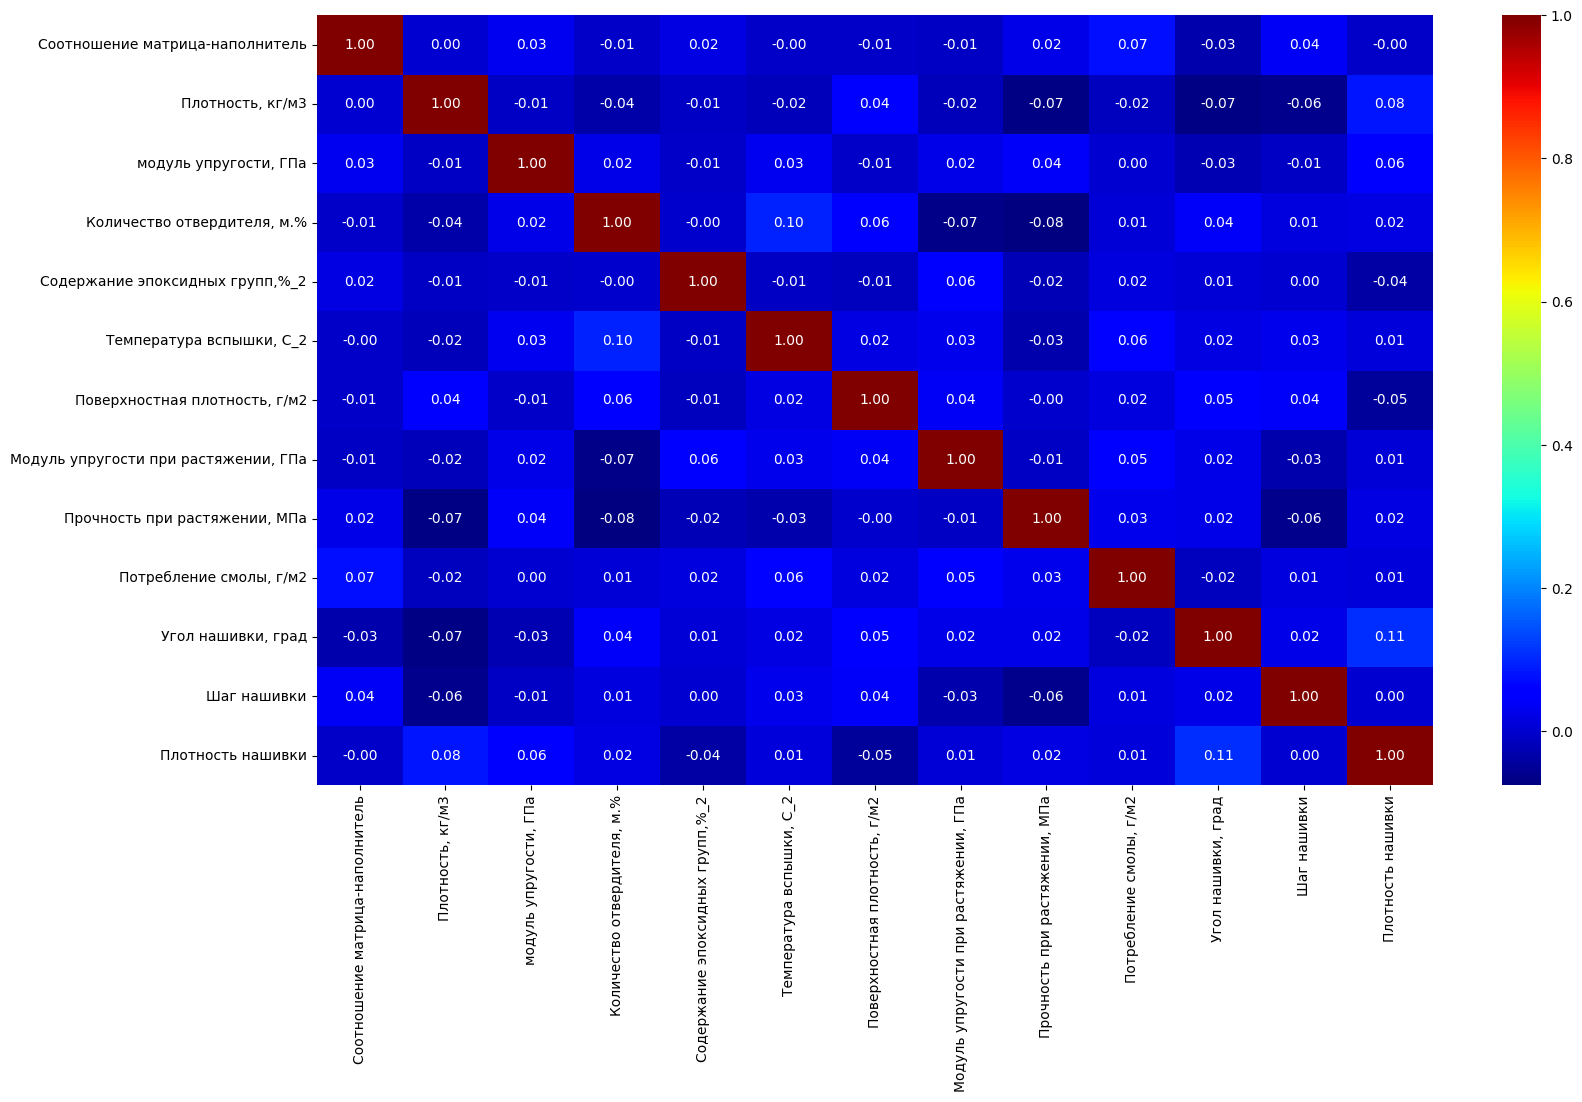

In [36]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True, ax=ax, cmap='jet', fmt='.2f')
plt.show()

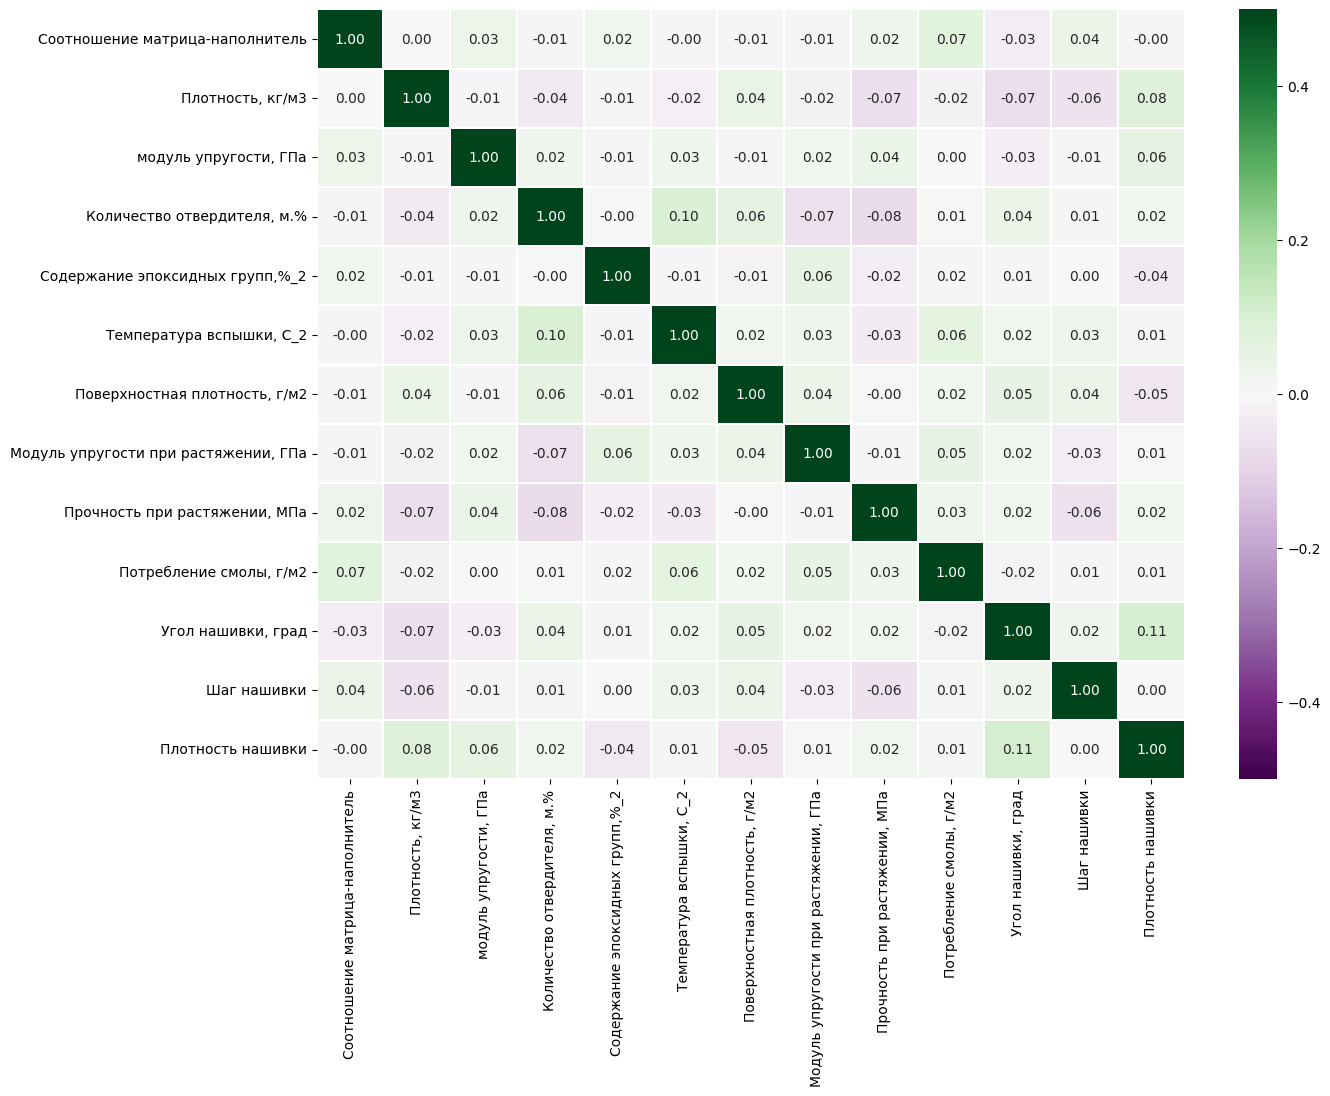

In [65]:
def corr_matrix(ds):
    cor_map = ds.corr()
    fig, ax = plt.subplots(figsize=(14, 10))
    sns.heatmap(cor_map, vmin=-0.5, vmax=0.5, annot=True, fmt='.2f',cmap='PRGn', ax=ax, linewidths = 0.1)
    plt.show()

corr_matrix(df)

Исследуем линейную зависимость попарно

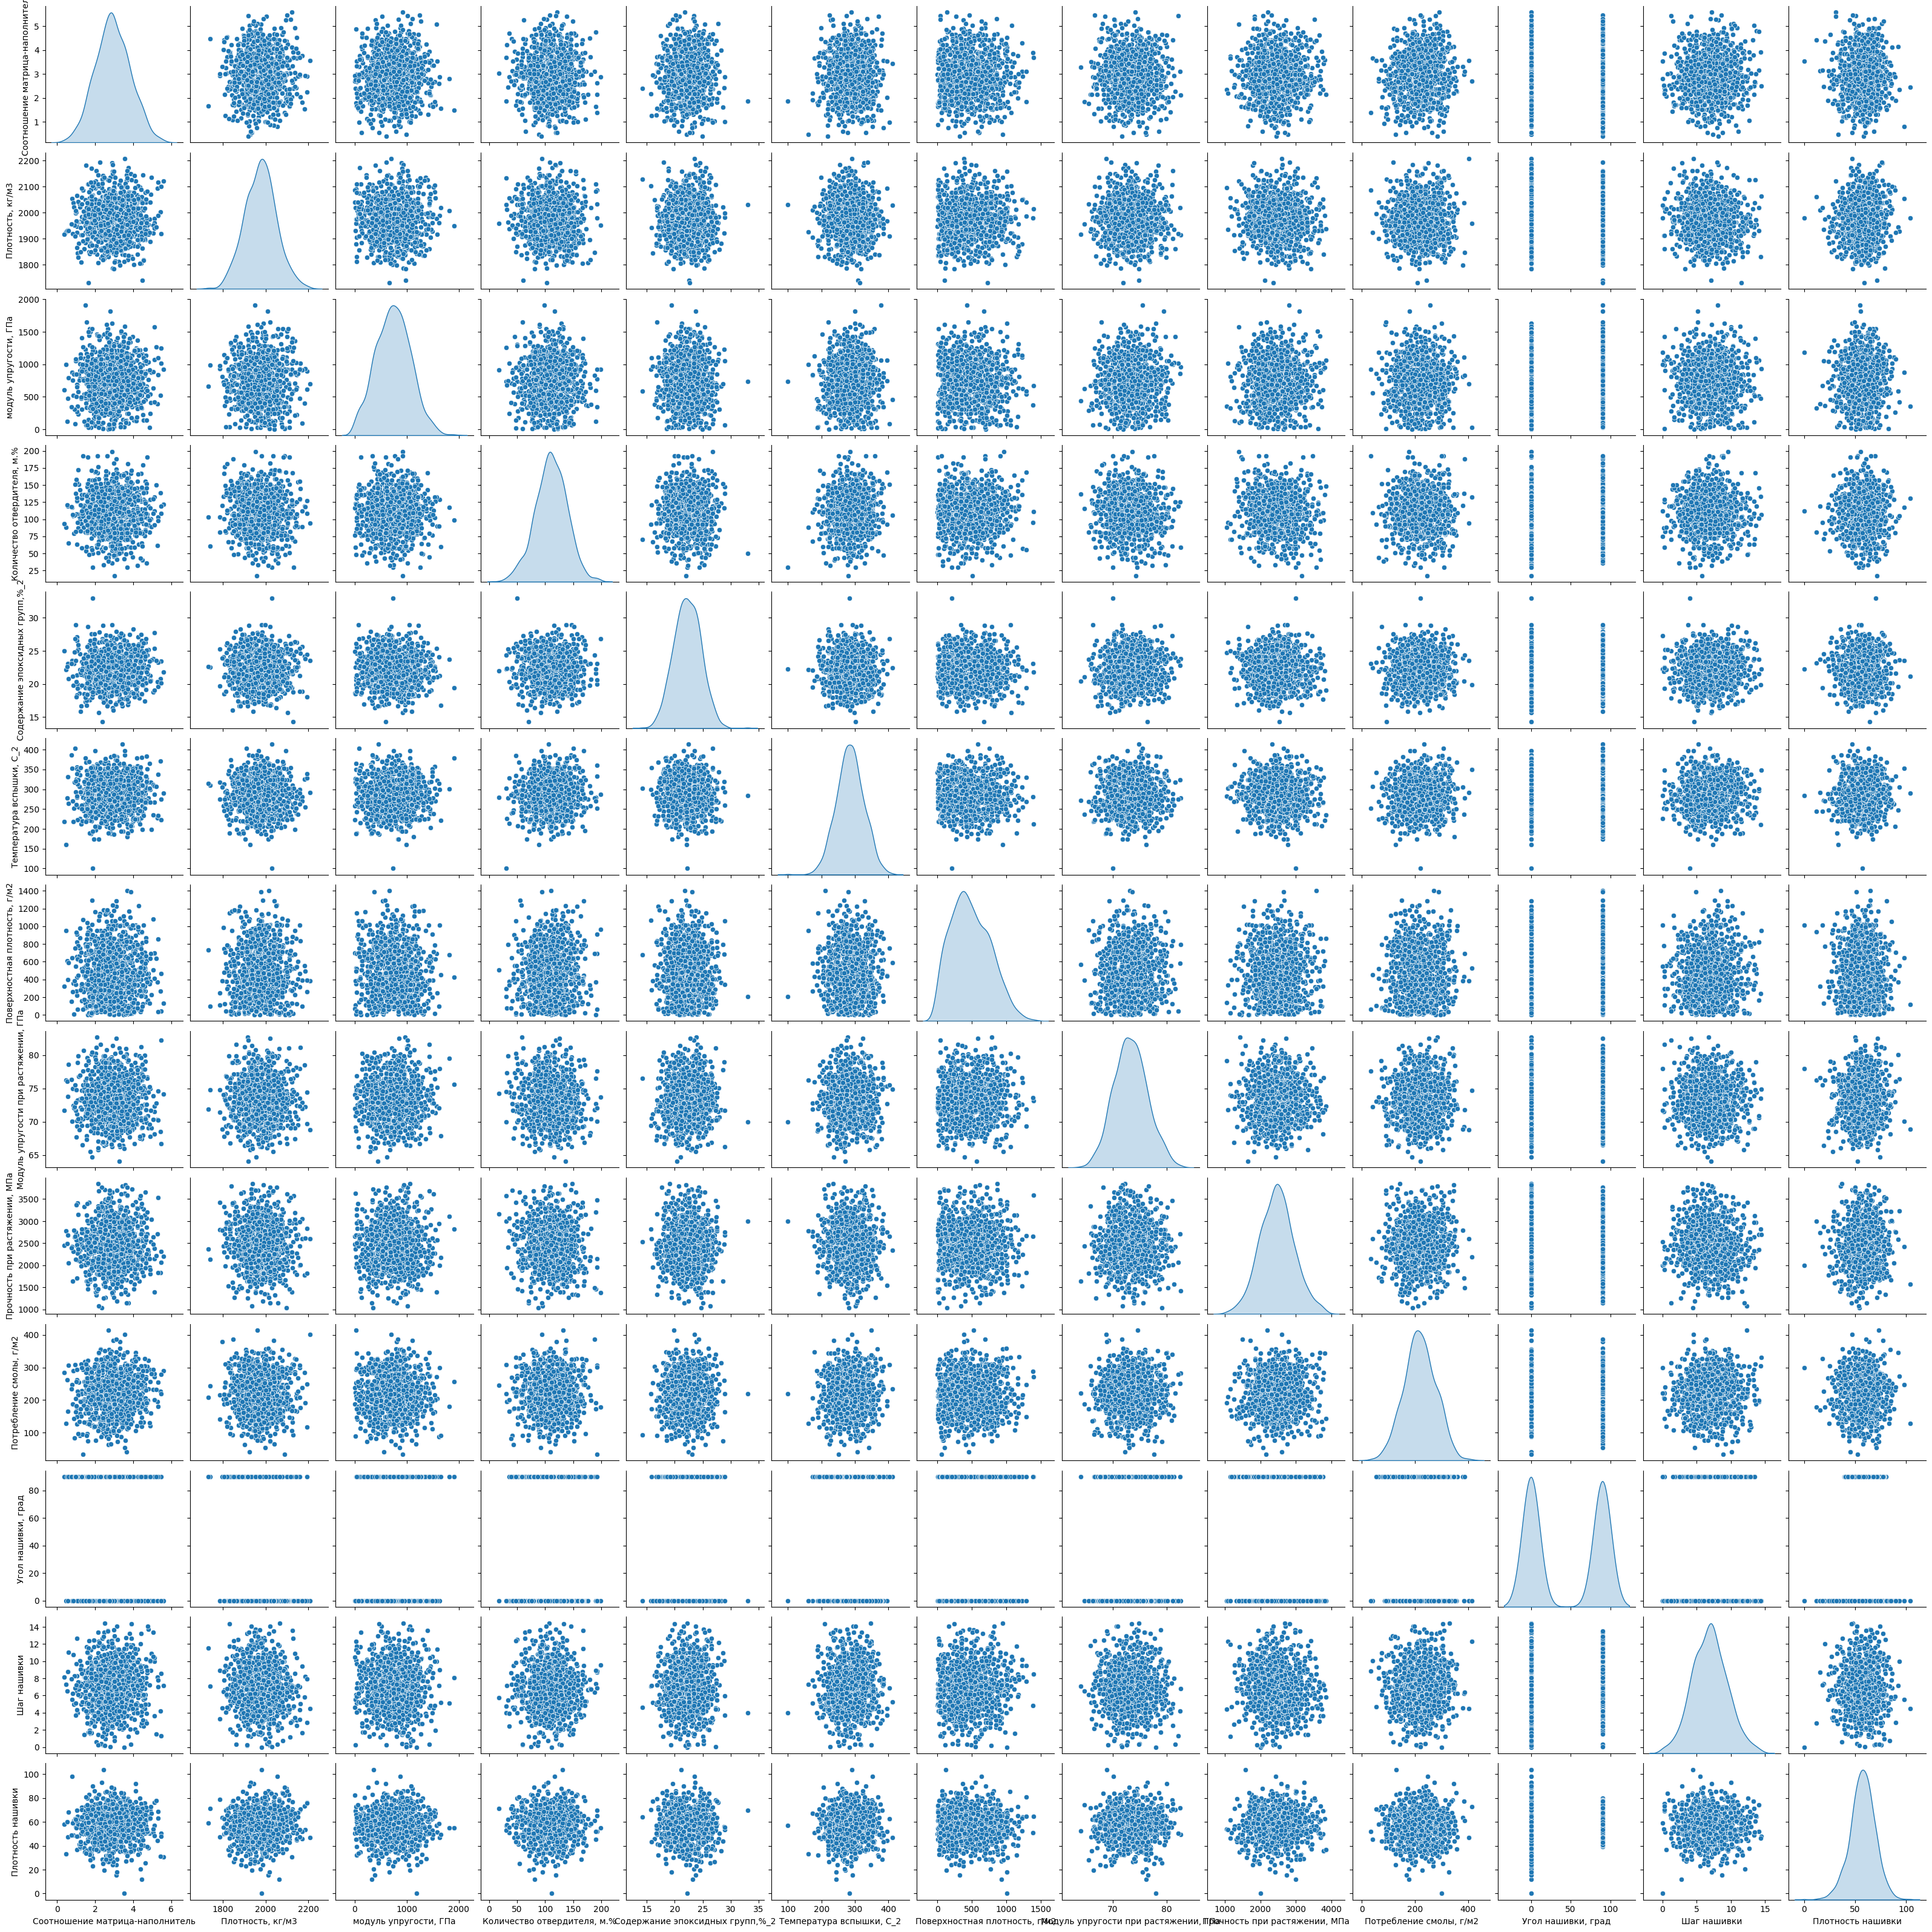

In [37]:
sns.pairplot(df, diag_kind='kde')

Хоть сколько-то значимые корреляции не выявлены

Посмотрим основные свойства датасета

In [38]:
df.describe().round(2).T

count     mean     std      min  \
Соотношение матрица-наполнитель       1023.0     2.93    0.91     0.39   
Плотность, кг/м3                      1023.0  1975.73   73.73  1731.76   
модуль упругости, ГПа                 1023.0   739.92  330.23     2.44   
Количество отвердителя, м.%           1023.0   110.57   28.30    17.74   
Содержание эпоксидных групп,%_2       1023.0    22.24    2.41    14.25   
Температура вспышки, С_2              1023.0   285.88   40.94   100.00   
Поверхностная плотность, г/м2         1023.0   482.73  281.31     0.60   
Модуль упругости при растяжении, ГПа  1023.0    73.33    3.12    64.05   
Прочность при растяжении, МПа         1023.0  2466.92  485.63  1036.86   
Потребление смолы, г/м2               1023.0   218.42   59.74    33.80   
Угол нашивки, град                    1023.0    44.25   45.02     0.00   
Шаг нашивки                           1023.0     6.90    2.56     0.00   
Плотность нашивки                     1023.0    57.15   12.35     0.00   

                                          25%      50%      75%      max  
Соотношение матрица-наполнитель          2.32     2.91     3.55     5.59  
Плотность, кг/м3                      1924.16  1977.62  2021.37  2207.77  
модуль упругости, ГПа                  500.05   739.66   961.81  1911.54  
Количество отвердителя, м.%             92.44   110.56   129.73   198.95  
Содержание эпоксидных групп,%_2         20.61    22.23    23.96    33.00  
Температура вспышки, С_2               259.07   285.90   313.00   413.27  
Поверхностная плотность, г/м2          266.82   451.86   693.23  1399.54  
Модуль упругости при растяжении, ГПа    71.25    73.27    75.36    82.68  
Прочность при растяжении, МПа         2135.85  2459.52  2767.19  3848.44  
Потребление смолы, г/м2                179.63   219.20   257.48   414.59  
Угол нашивки, град                       0.00     0.00    90.00    90.00  
Шаг нашивки                              5.08     6.92     8.59    14.44  
Плотность нашивки                       49.80    57.34    64.94   103.99

In [39]:
df.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Гистограммы

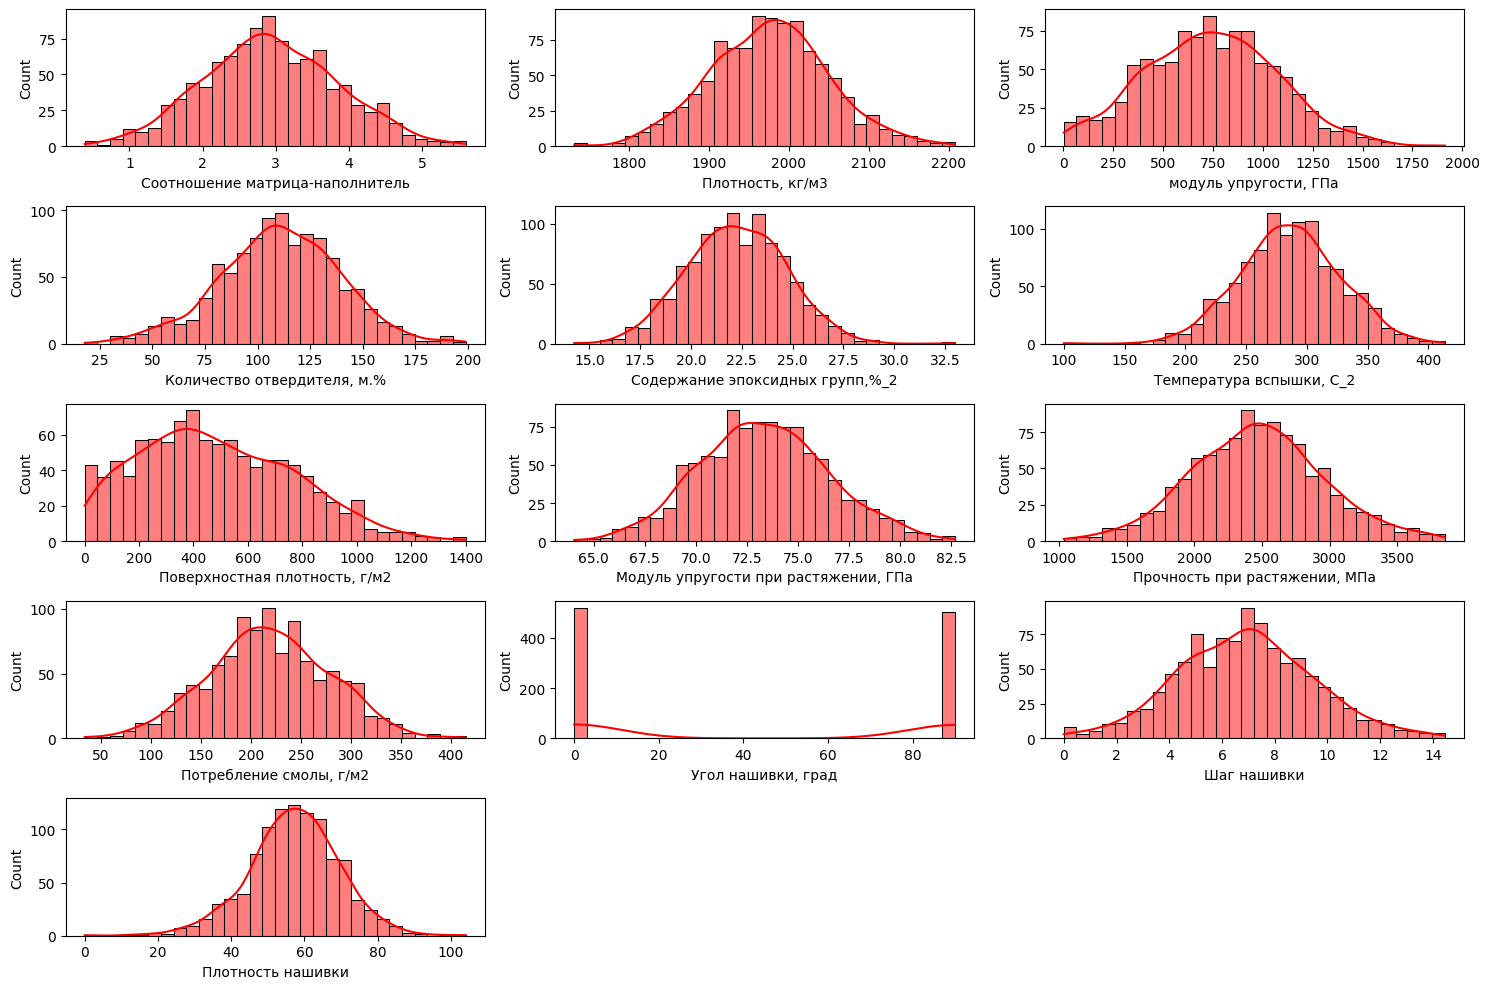

In [44]:
def histodraw(ds, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15, 10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.histplot(data=ds, x=var_name, kde=True, bins=30, color = 'red')
    fig.tight_layout()
    plt.show()

histodraw(df, df.columns, 5, 3)    

Boxplot - ящик усами

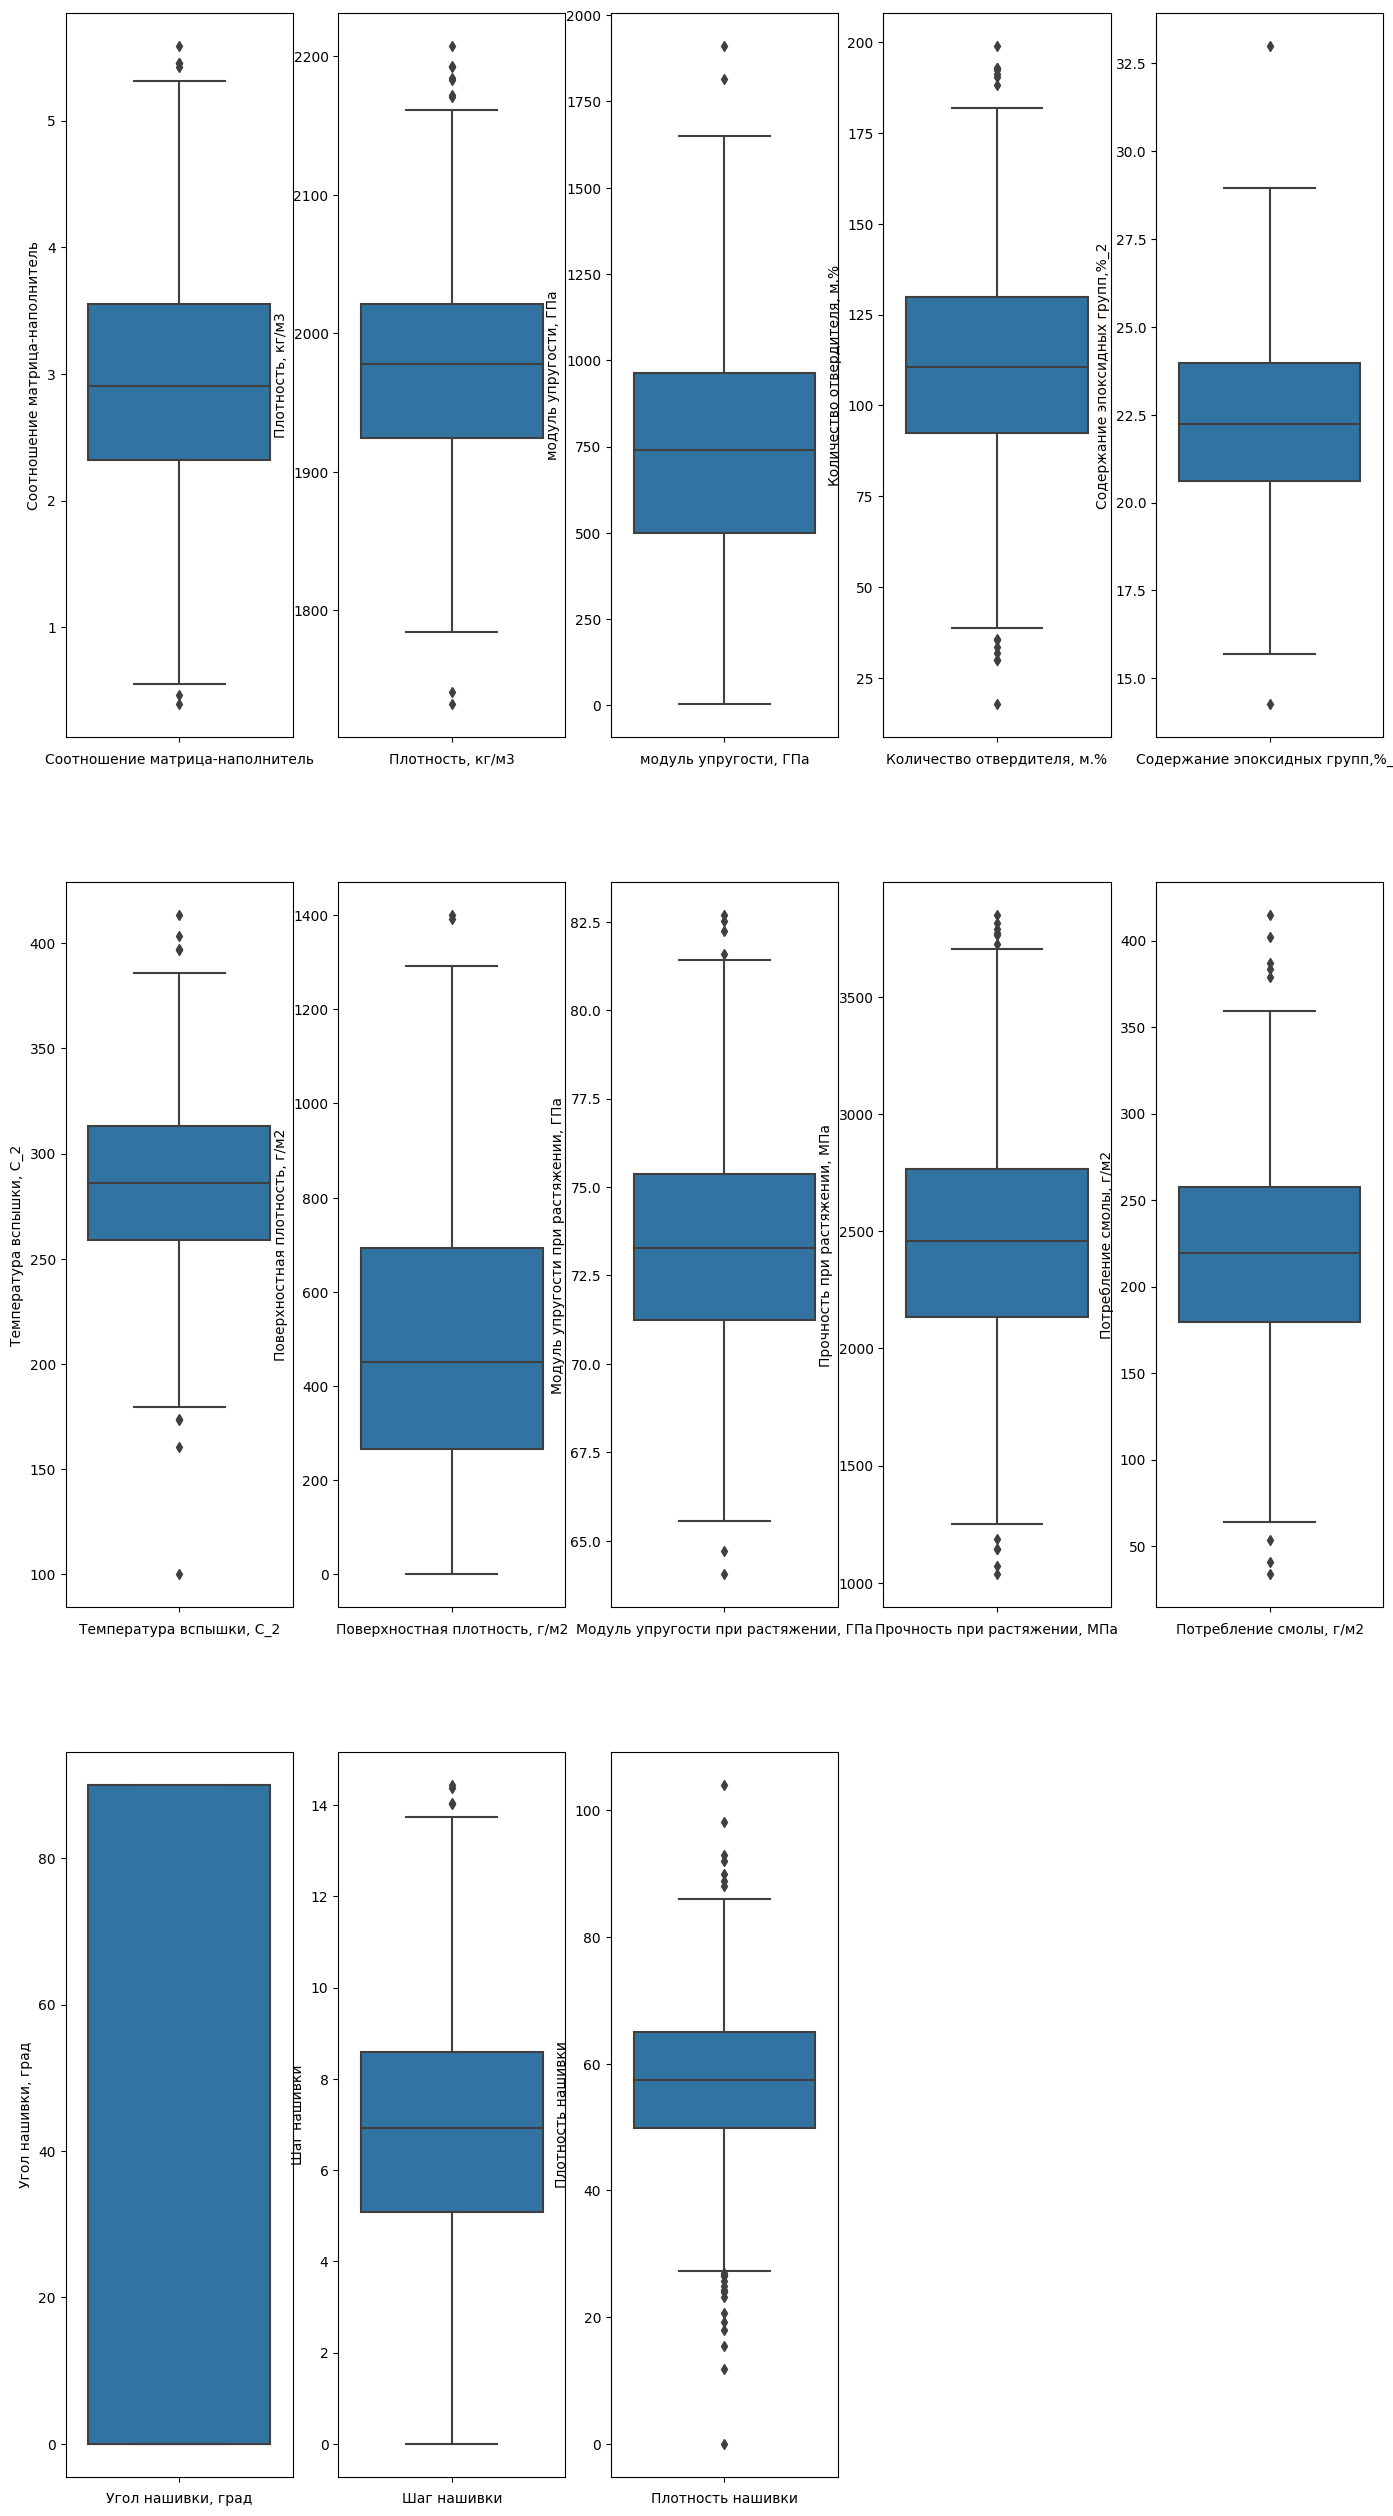

In [63]:
def boxplot_show(ds, row, col):
    n = 1 # счетчик
    #s = 3 # строки
    #c = 5 # столбцы
    fig = plt.figure(figsize=(17, 32))
    for i in ds.columns:
        plt.subplot(row, col, n)
        plt.xlabel(i)
        sns.boxplot(y = df[i])
        n = n + 1
    plt.show()

boxplot_show(df, 3, 5)

Есть выбросы, необходимо обработать

## Обработка выбросов

Сравнение двух методов удаления выбросов: 3-х сигм или
межквартильных расстояний

In [48]:
sgm = 0
iqd= 0
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    sgm += d['3s'].sum()
    # методом межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    iqd+= d['iq'].sum()
print( sgm,'-- выброс методом 3-х сигм',)
print( iqd,'-- выброс методом межквартильных расстояний',)

24 -- выброс методом 3-х сигм
93 -- выброс методом межквартильных расстояний


24 - не так уж и много для датасета
93 - это уже 9%

В целом, без понимания предметной области, трудно объяснить, что это - выброс или редковстречающаеся значение характеристики

Распределение выбросов по характеристикам

In [50]:
tdf = df.copy()
for i in df.columns:
    tdf[i] = abs((df[i] - df[i].mean()) / df[i].std())
    print(f"{sum(tdf[i] > 3)} -> выбросов в признаке: '{i}'")
print(f' Всего - {sum(sum(tdf.values > 3))} выброса')

0 -> выбросов в признаке: 'Соотношение матрица-наполнитель'
3 -> выбросов в признаке: 'Плотность, кг/м3'
2 -> выбросов в признаке: 'модуль упругости, ГПа'
2 -> выбросов в признаке: 'Количество отвердителя, м.%'
2 -> выбросов в признаке: 'Содержание эпоксидных групп,%_2'
3 -> выбросов в признаке: 'Температура вспышки, С_2'
2 -> выбросов в признаке: 'Поверхностная плотность, г/м2'
0 -> выбросов в признаке: 'Модуль упругости при растяжении, ГПа'
0 -> выбросов в признаке: 'Прочность при растяжении, МПа'
3 -> выбросов в признаке: 'Потребление смолы, г/м2'
0 -> выбросов в признаке: 'Угол нашивки, град'
0 -> выбросов в признаке: 'Шаг нашивки'
7 -> выбросов в признаке: 'Плотность нашивки'
 Всего - 24 выброса


По каждой характеристик в среднем 2-3 выброса, по одной из них 7, что составляет 0,6% и не должно оказывать влияния на алгоритмы обработки

Попробуем все-таки преобразовать датасет, удалив выбросы и закодировав "Угол нашивки"

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encode = df.copy()
df_encode['Угол нашивки, град'] = le.fit_transform(df['Угол нашивки, град'])

df_encode

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836523                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

In [ ]:
#from sklearn.preprocessing import OneHotEncoder

#df_encode_oh = df.copy()
#ohe = OneHotEncoder(categories = df_encode_oh['Угол нашивки, град'])
#df_encode_oh  = ohe.fit_transform(df_encode_oh)

#df_encode_oh

In [62]:
import scipy.stats as stats

df_encode_drop = df_encode[(np.abs(stats.zscore(df)) <= 3).all(axis=1)]
df_encode_drop

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
5                            2.767918       2000.000000   
6                            2.569620       1910.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                738.736842                    50.000000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
5                748.000000                   111.860000   
6                807.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836523                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                           23.750000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
5                           22.267857                284.615385   
6                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
5                        210.000000                             70.000000   
6                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
5                       3000.000000               220.000000   
6                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

Boxplot после удаления выбросов

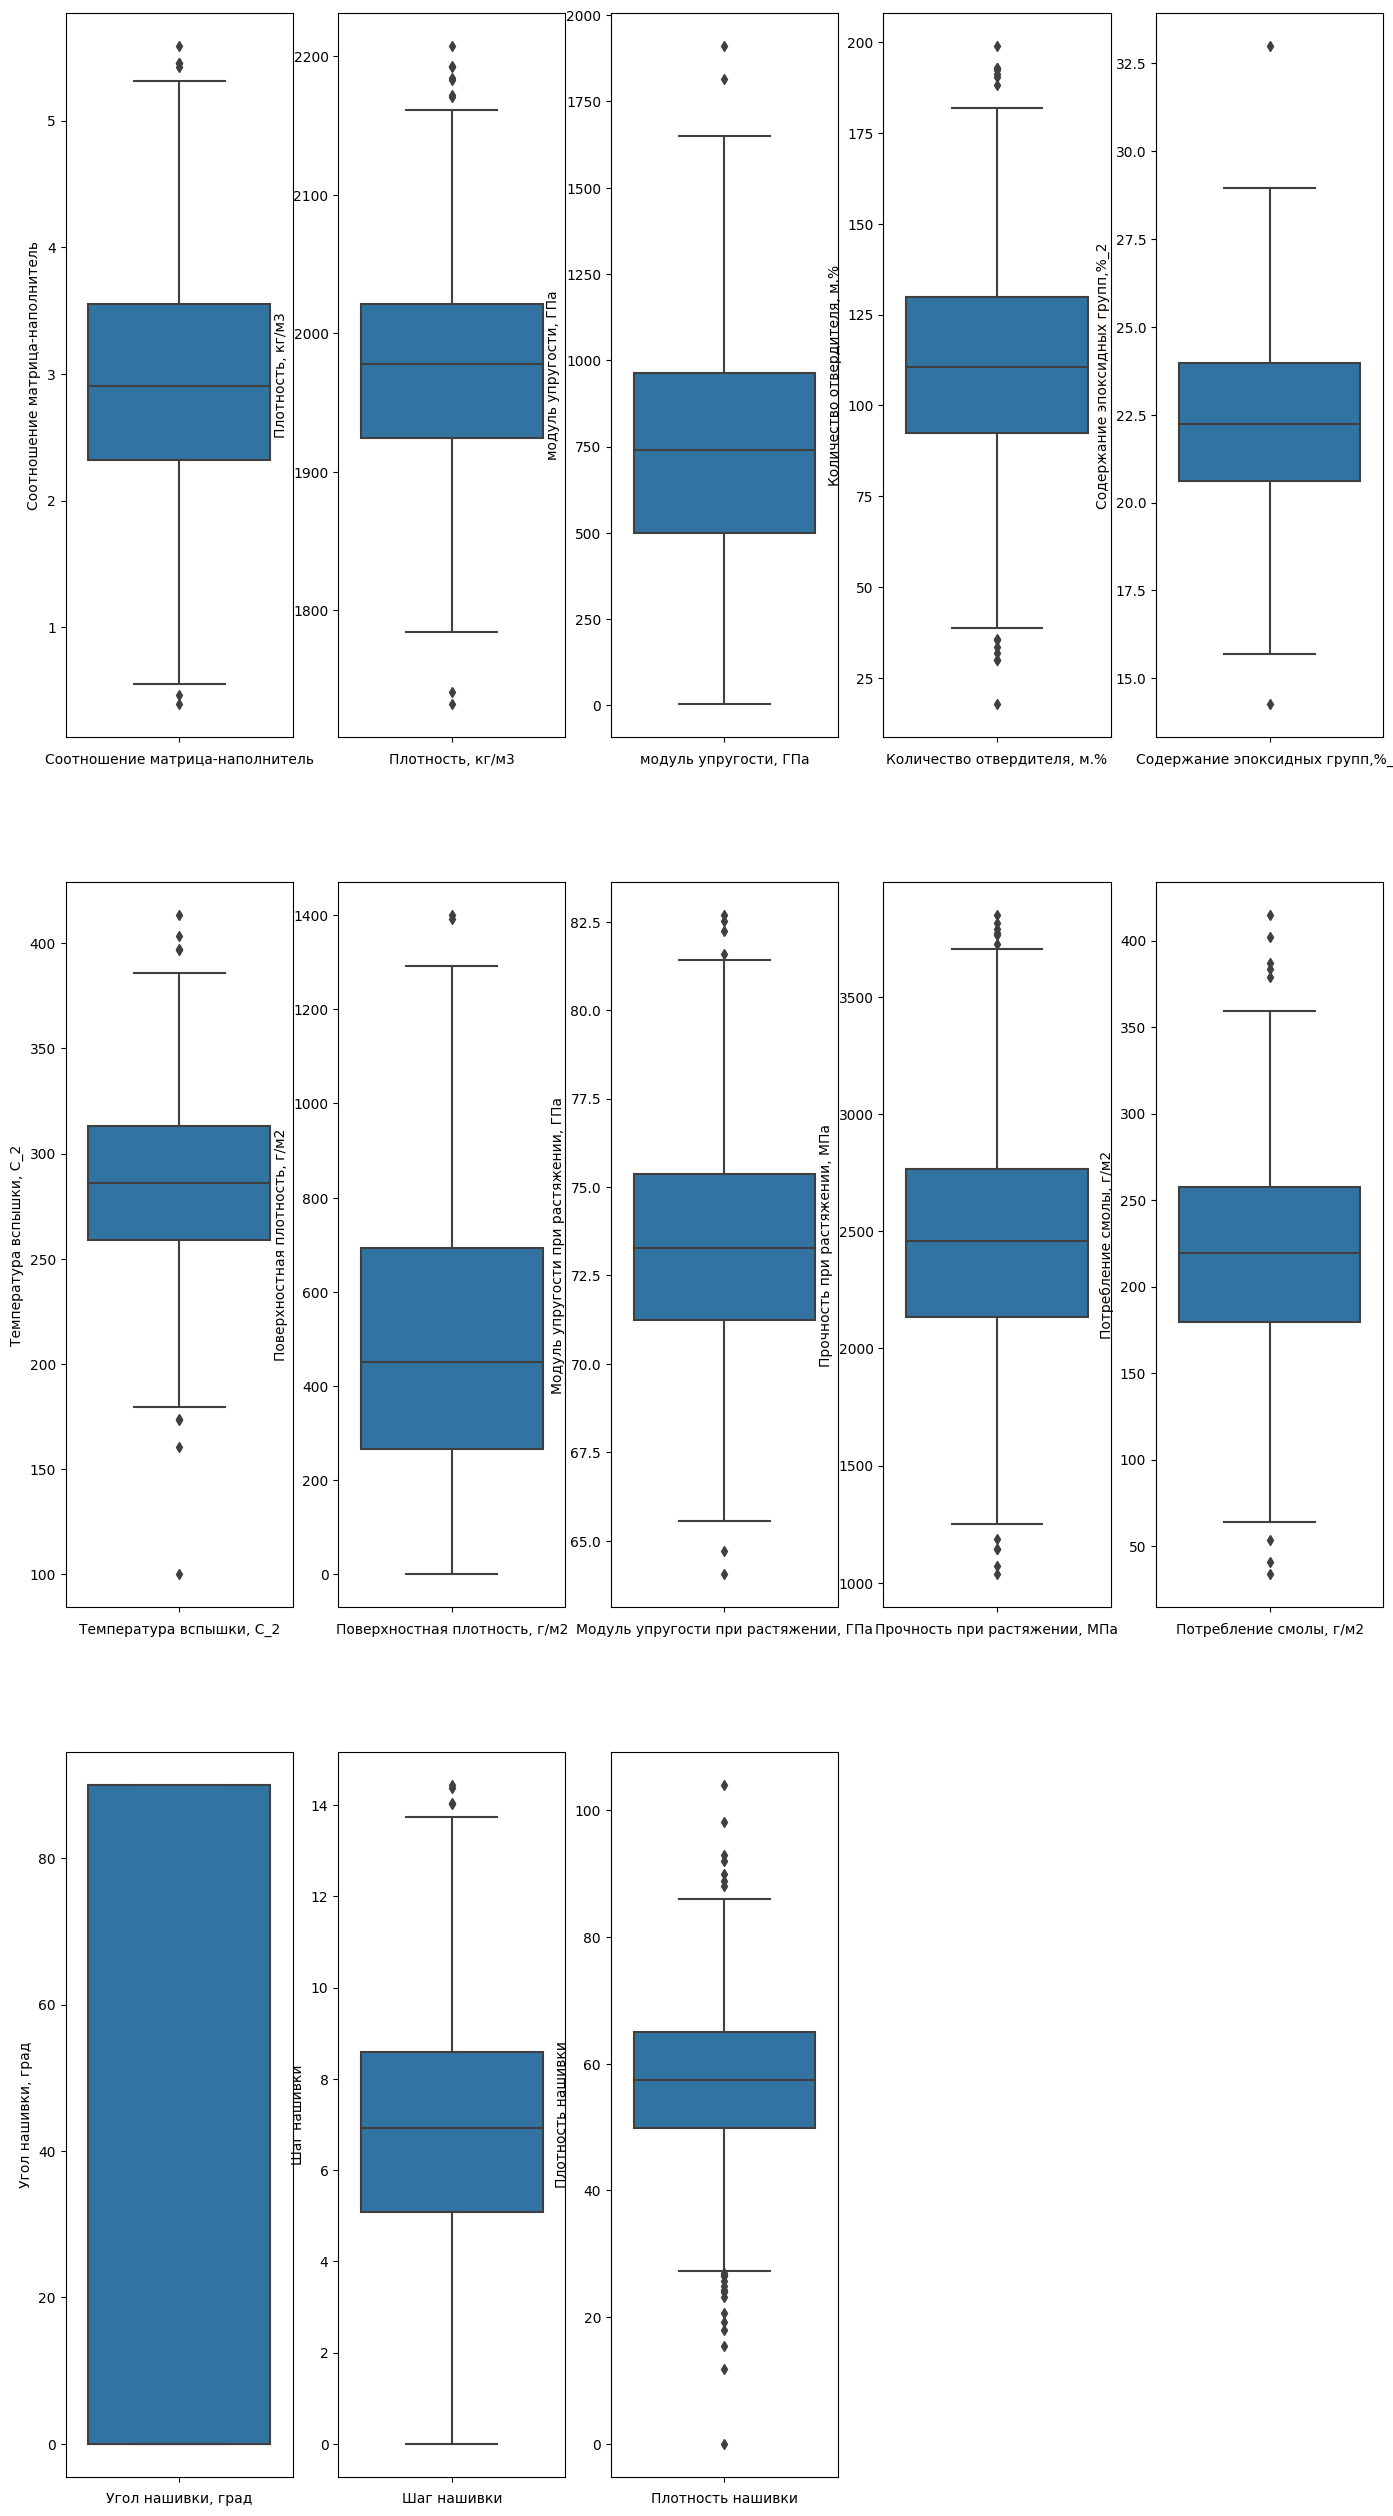

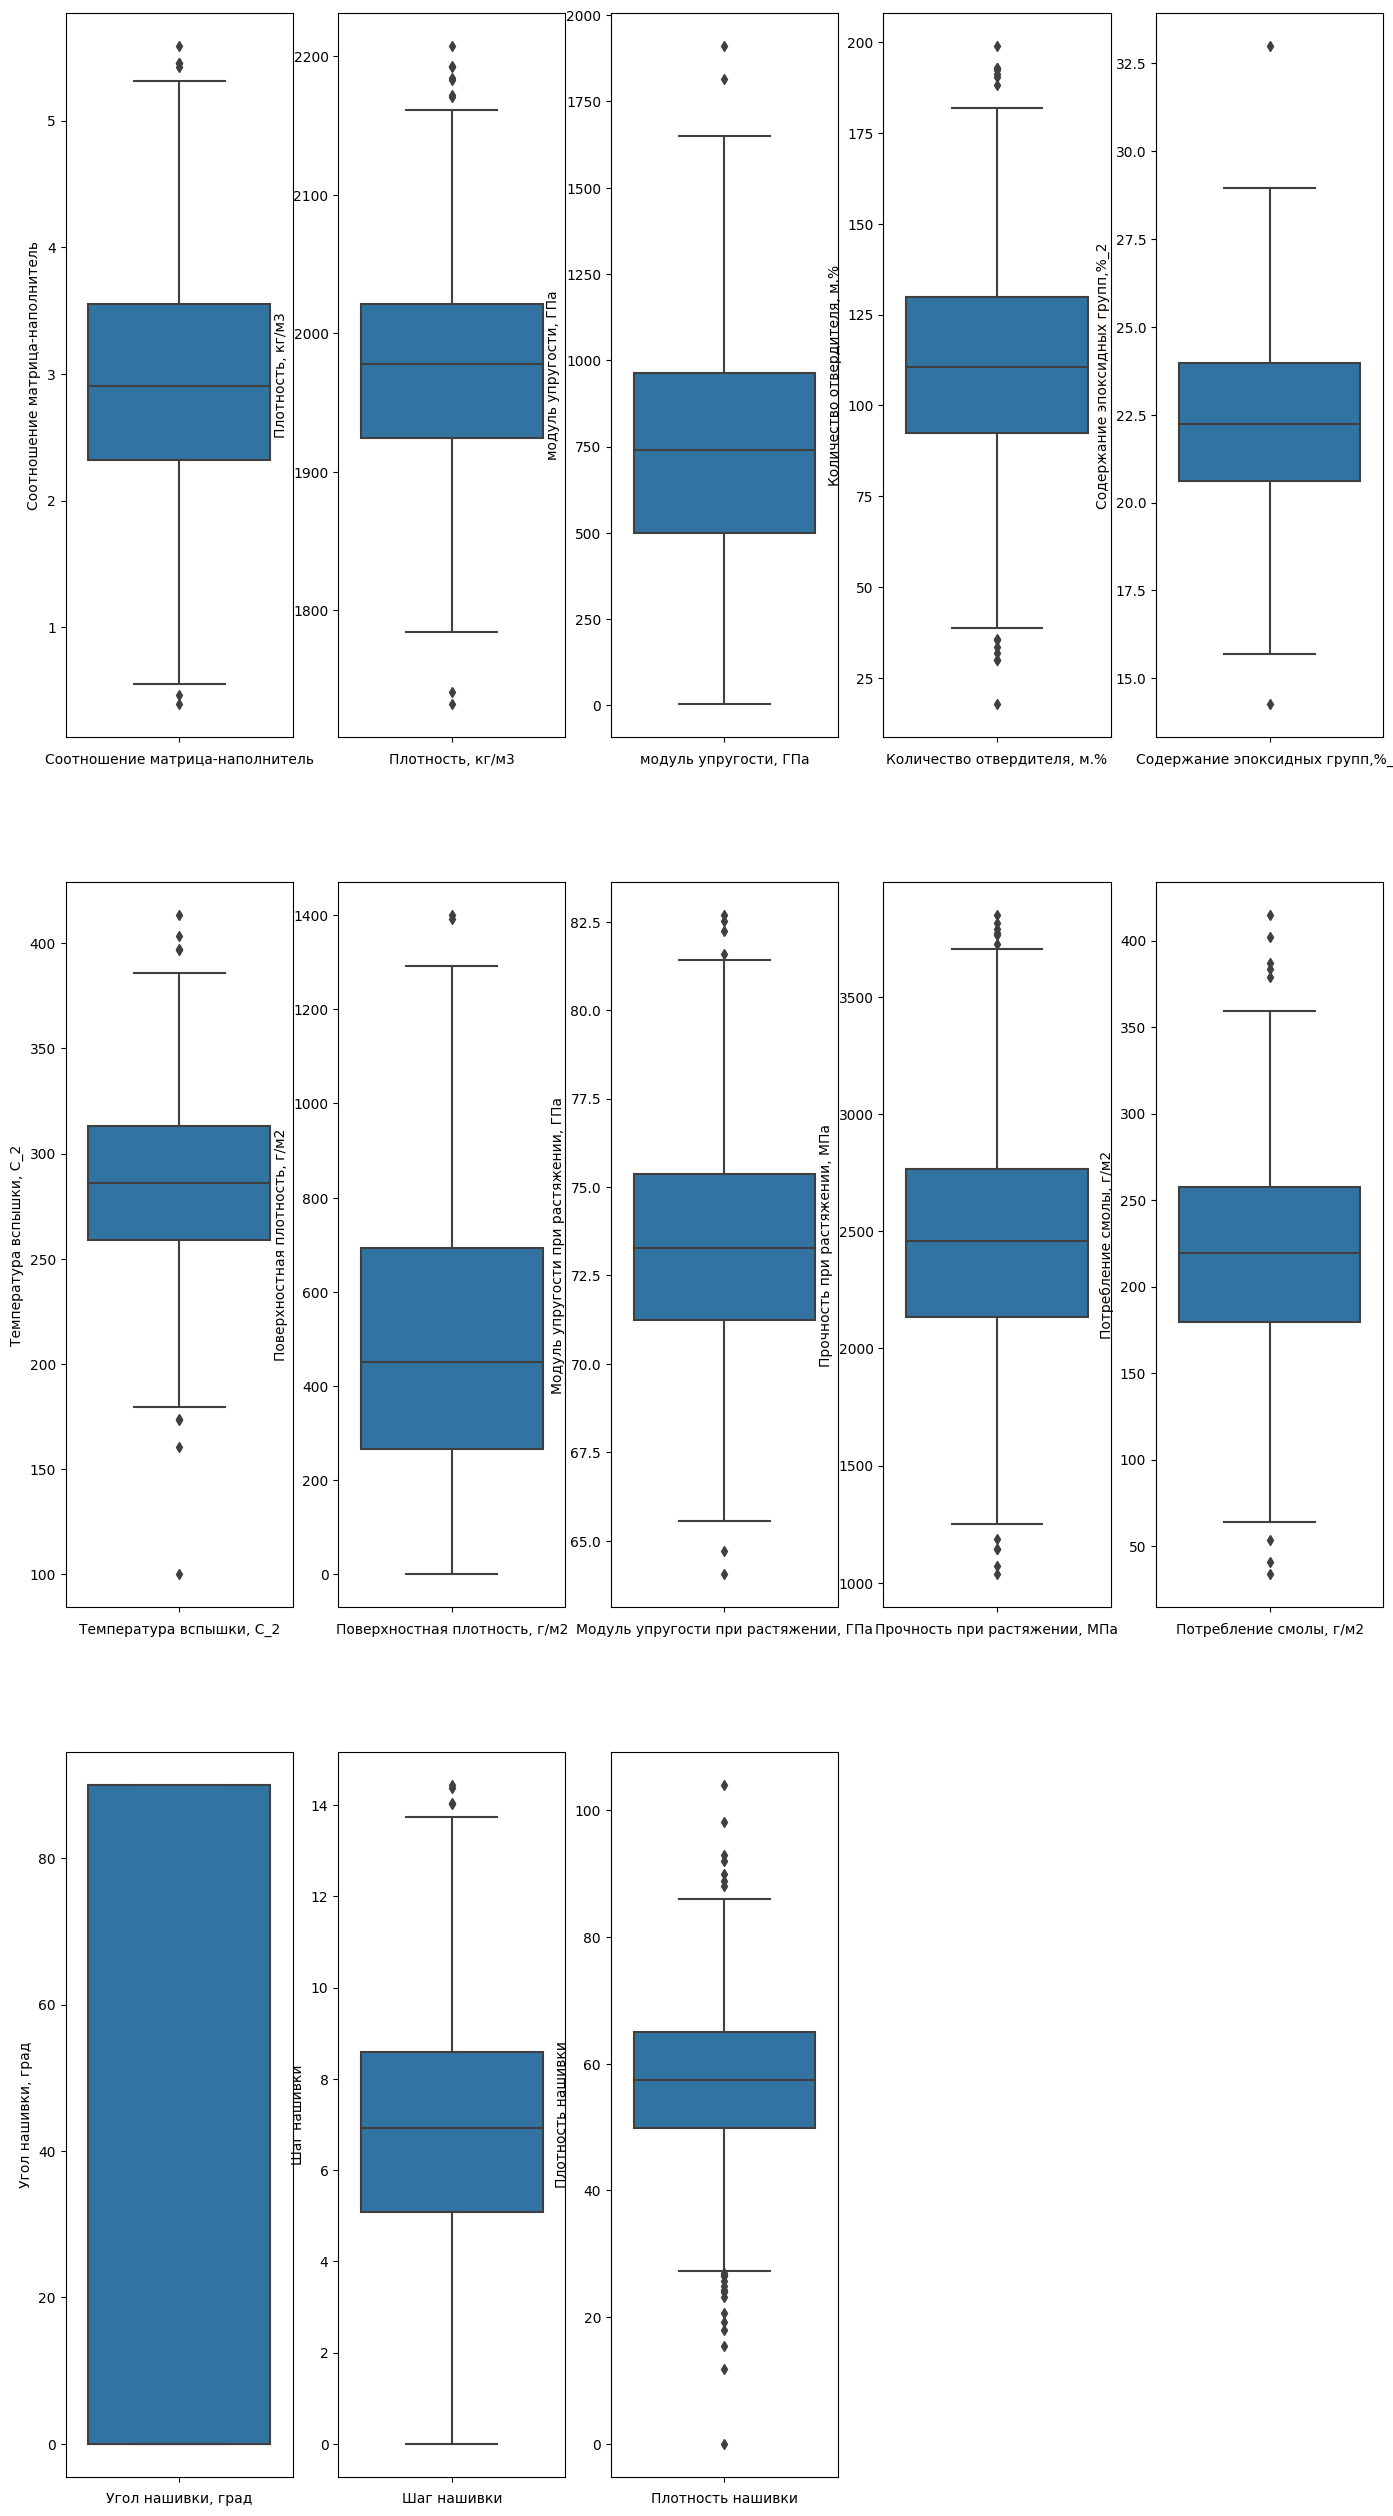

In [64]:
boxplot_show(df_encode_drop, 3, 5)

Корреляционная матрица после удаления выбросов

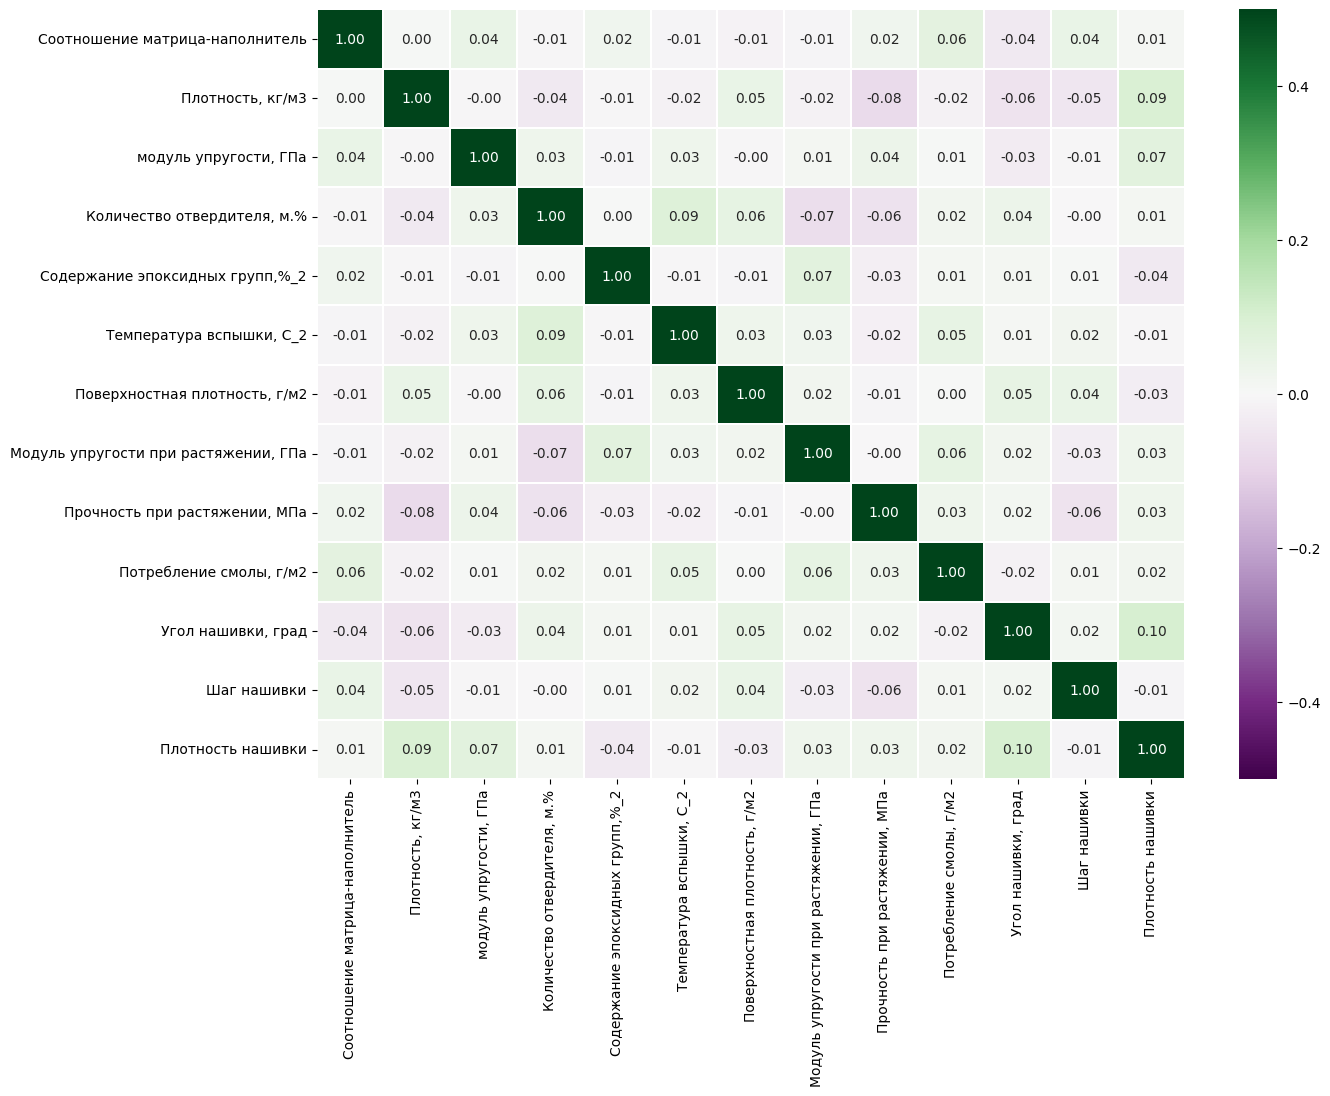

In [66]:
corr_matrix(df_encode_drop)

Никакой взаимосвязи переменных между собой. Выбросов совсем мало было, они вряд ли влтяли бы. Но на всякий случай рроверили. Отрицательный результат - тоже результат.

# Нормализация

### Оценка плотности ядра

<AxesSubplot: ylabel='Density'>

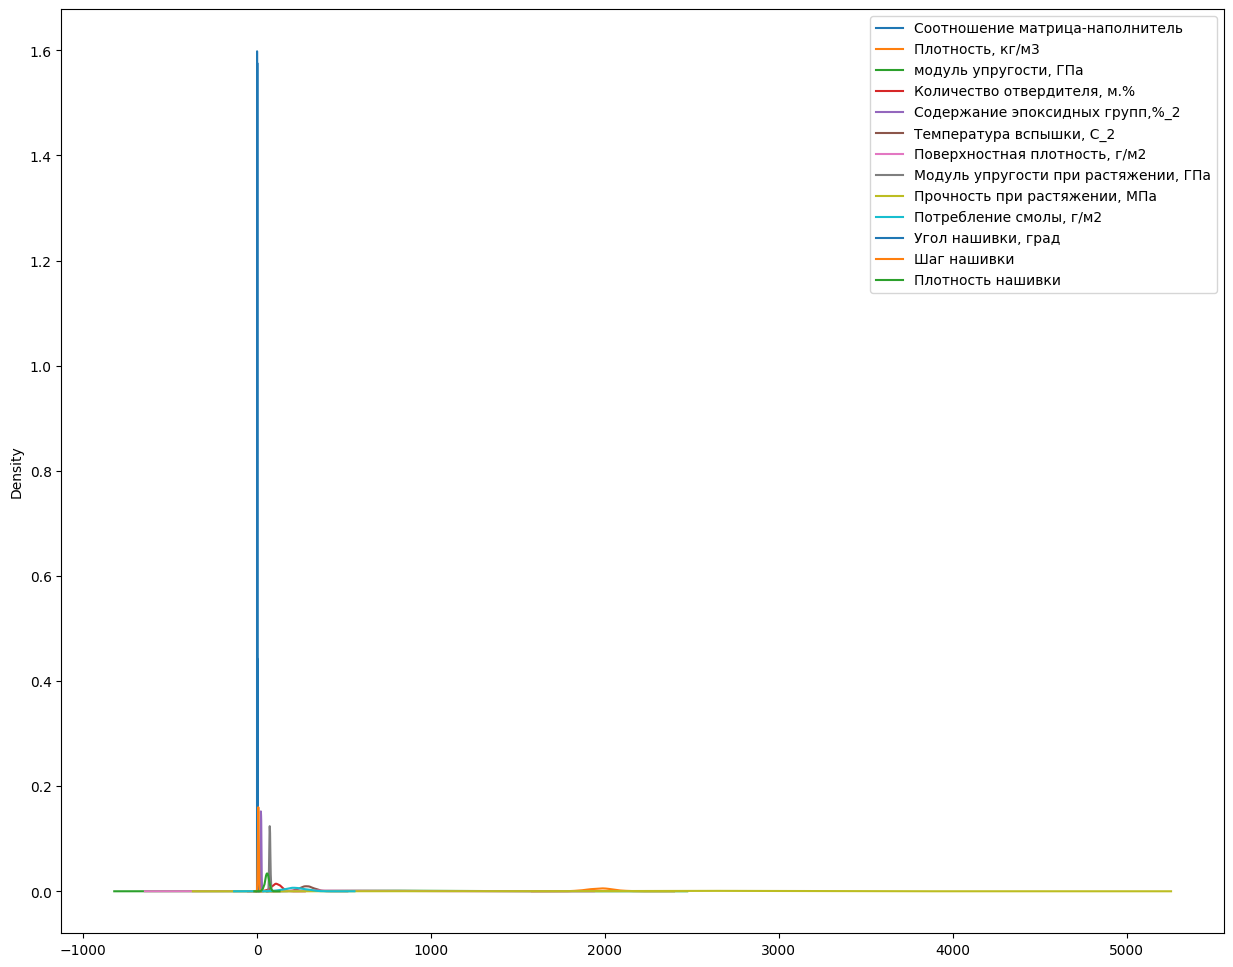

In [67]:
fig, ax = plt.subplots(figsize=(15, 12))
df_encode_drop.plot(kind='kde', ax=ax)

Диапазоны данных сильно расходятся. Выполним нормализацию minmaxscaller.

In [71]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = preprocessing.MinMaxScaler()
names = df_encode_drop.columns
d = scaler.fit_transform(df_encode_drop)
df_encode_drop_norm = pd.DataFrame(d, columns=names).round(2)

df_encode_drop_norm.describe().round(2).T

count  mean   std  min   25%   50%  \
Соотношение матрица-наполнитель       999.0  0.49  0.17  0.0  0.37  0.48   
Плотность, кг/м3                      999.0  0.47  0.18  0.0  0.34  0.47   
модуль упругости, ГПа                 999.0  0.45  0.20  0.0  0.30  0.45   
Количество отвердителя, м.%           999.0  0.50  0.17  0.0  0.38  0.50   
Содержание эпоксидных групп,%_2       999.0  0.49  0.18  0.0  0.37  0.49   
Температура вспышки, С_2              999.0  0.49  0.17  0.0  0.37  0.49   
Поверхностная плотность, г/м2         999.0  0.37  0.22  0.0  0.21  0.35   
Модуль упругости при растяжении, ГПа  999.0  0.50  0.17  0.0  0.39  0.50   
Прочность при растяжении, МПа         999.0  0.51  0.17  0.0  0.39  0.50   
Потребление смолы, г/м2               999.0  0.51  0.17  0.0  0.40  0.51   
Угол нашивки, град                    999.0  0.50  0.50  0.0  0.00  0.00   
Шаг нашивки                           999.0  0.48  0.18  0.0  0.35  0.48   
Плотность нашивки                     999.0  0.51  0.16  0.0  0.41  0.51   

                                       75%  max  
Соотношение матрица-наполнитель       0.61  1.0  
Плотность, кг/м3                      0.58  1.0  
модуль упругости, ГПа                 0.58  1.0  
Количество отвердителя, м.%           0.61  1.0  
Содержание эпоксидных групп,%_2       0.62  1.0  
Температура вспышки, С_2              0.61  1.0  
Поверхностная плотность, г/м2         0.54  1.0  
Модуль упругости при растяжении, ГПа  0.61  1.0  
Прочность при растяжении, МПа         0.61  1.0  
Потребление смолы, г/м2               0.62  1.0  
Угол нашивки, град                    1.00  1.0  
Шаг нашивки                           0.59  1.0  
Плотность нашивки                     0.61  1.0

In [72]:
df_encode_drop_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       999 non-null    float64
 1   Плотность, кг/м3                      999 non-null    float64
 2   модуль упругости, ГПа                 999 non-null    float64
 3   Количество отвердителя, м.%           999 non-null    float64
 4   Содержание эпоксидных групп,%_2       999 non-null    float64
 5   Температура вспышки, С_2              999 non-null    float64
 6   Поверхностная плотность, г/м2         999 non-null    float64
 7   Модуль упругости при растяжении, ГПа  999 non-null    float64
 8   Прочность при растяжении, МПа         999 non-null    float64
 9   Потребление смолы, г/м2               999 non-null    float64
 10  Угол нашивки, град                    999 non-null    float64
 11  Шаг нашивки        

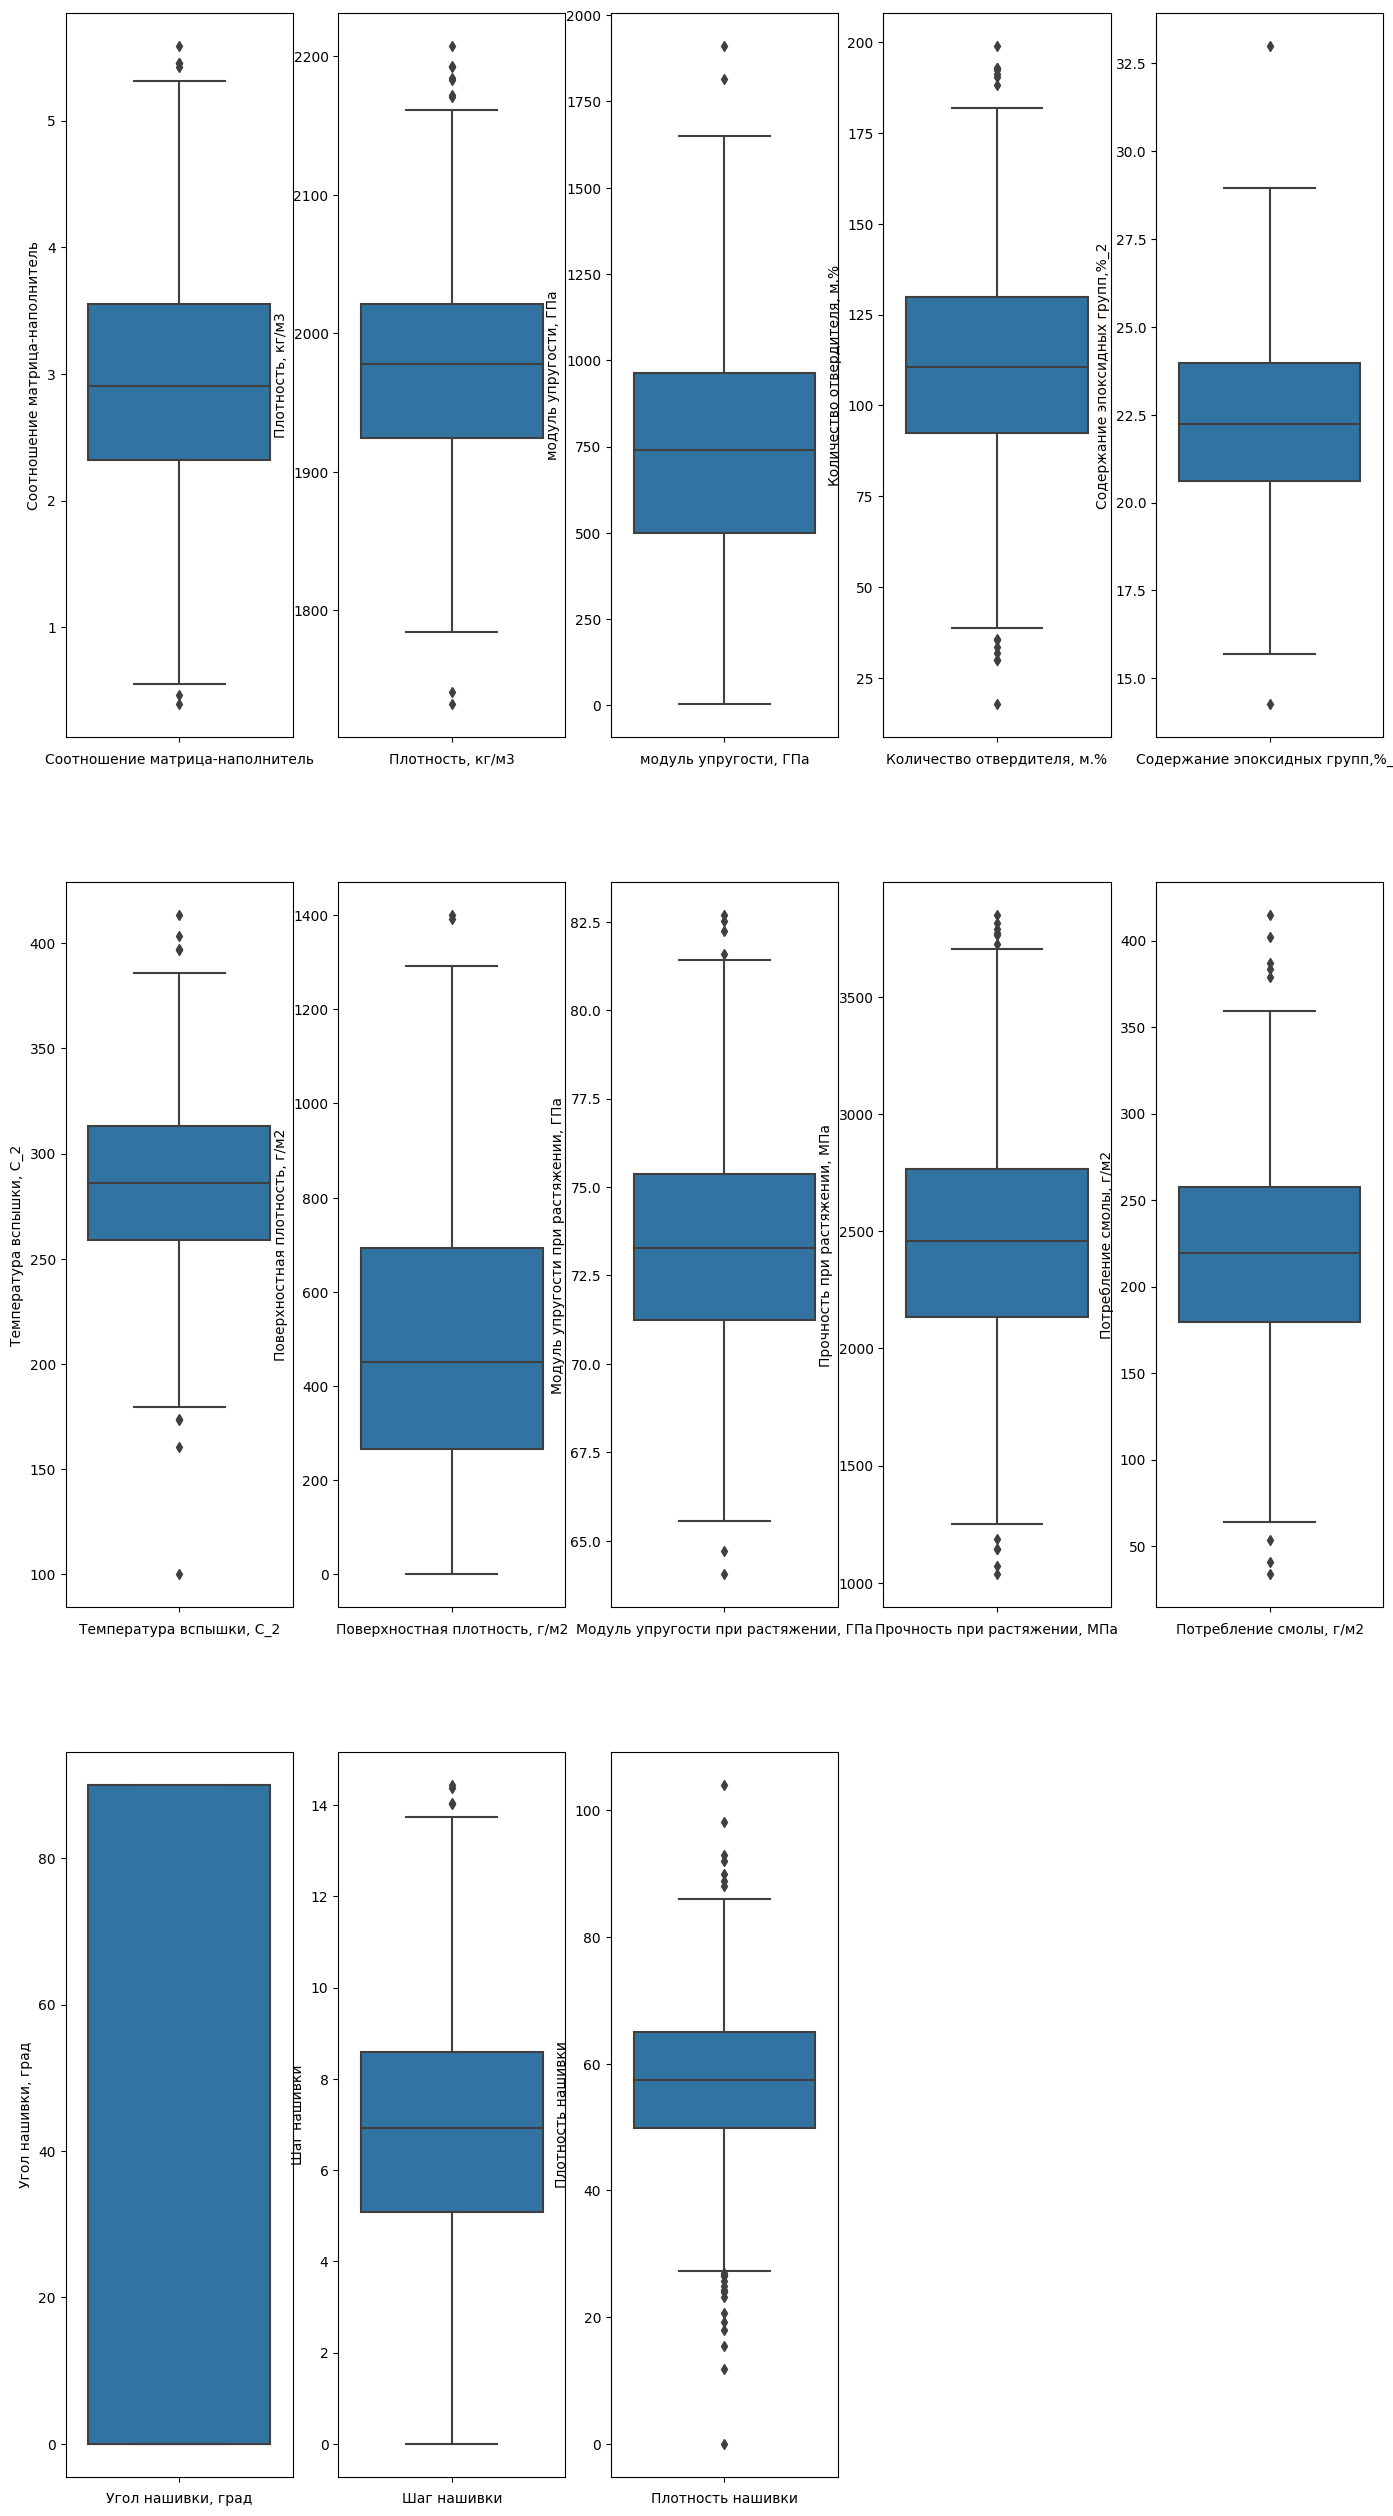

In [73]:
boxplot_show(df_encode_drop_norm, 3, 5)

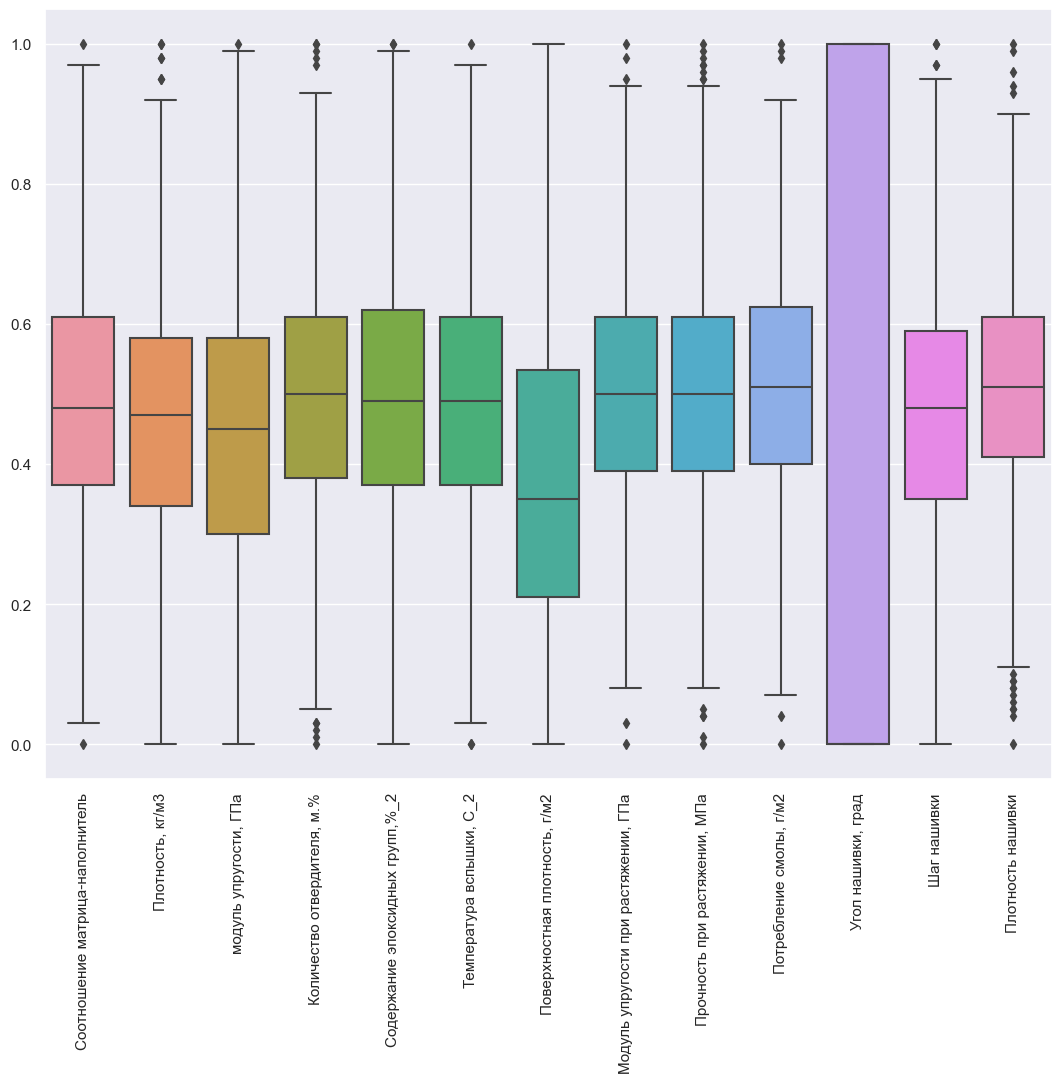

In [74]:
min_max_scaler = preprocessing.MinMaxScaler()
df_join_clean_norm = pd.DataFrame(min_max_scaler.fit_transform(df_encode_drop),
                                    columns = df_encode_drop.columns,
                                    index = df_encode_drop.index)
sns.set(rc={'figure.figsize':(13,10)})
ax = sns.boxplot(data=df_encode_drop_norm)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

Гистограмма после нормализации

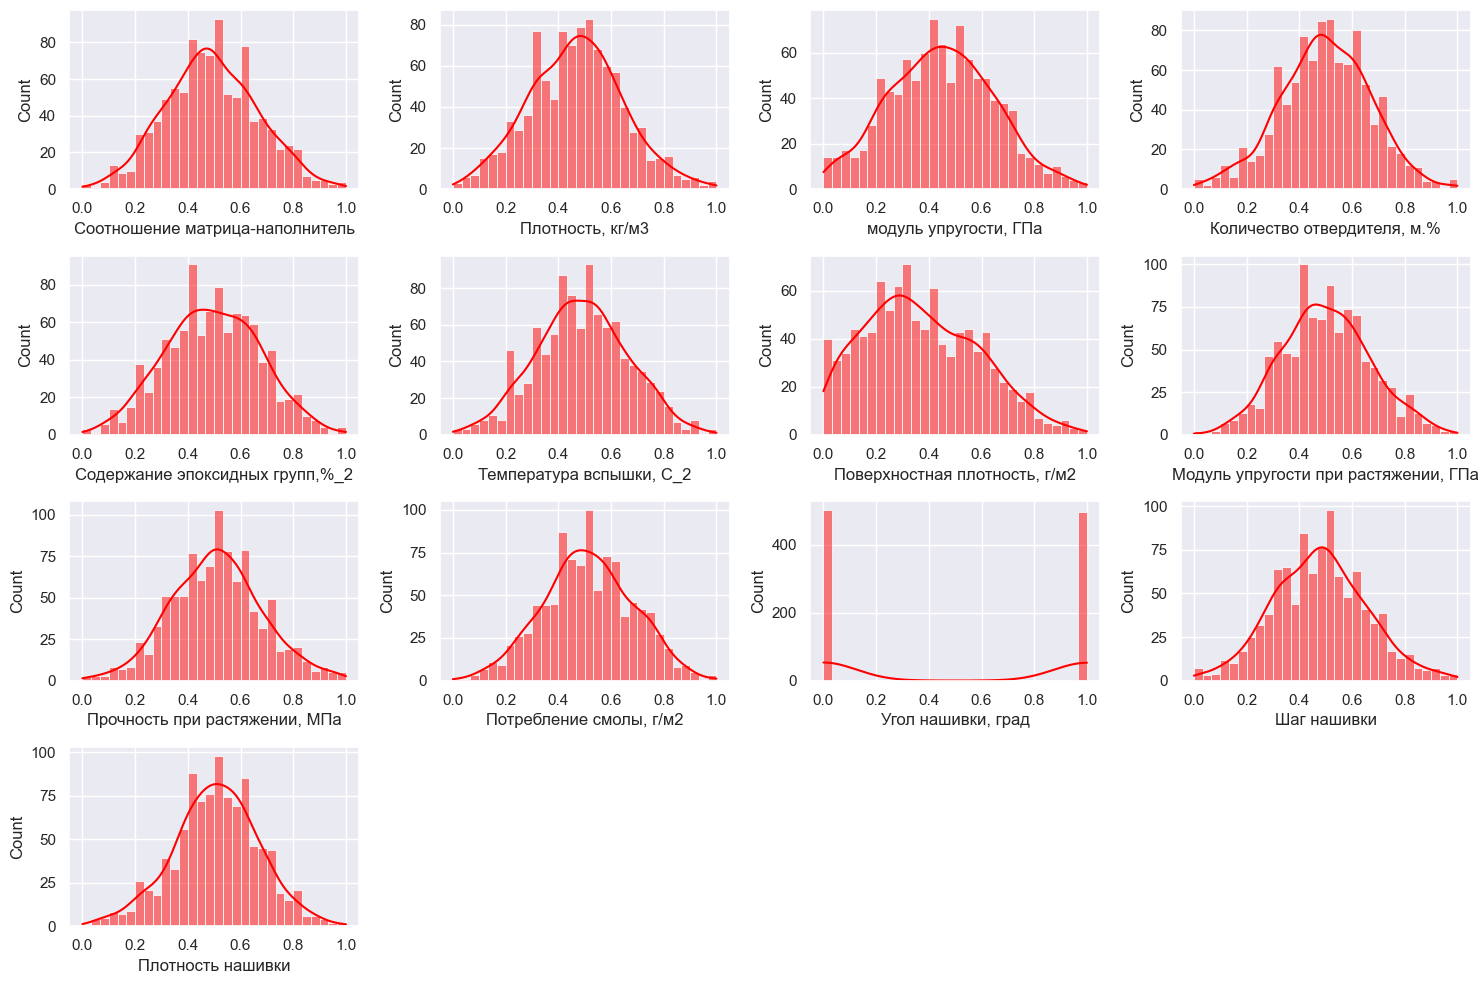

In [75]:
histodraw(df_encode_drop_norm, df_encode_drop.columns, 4, 4)

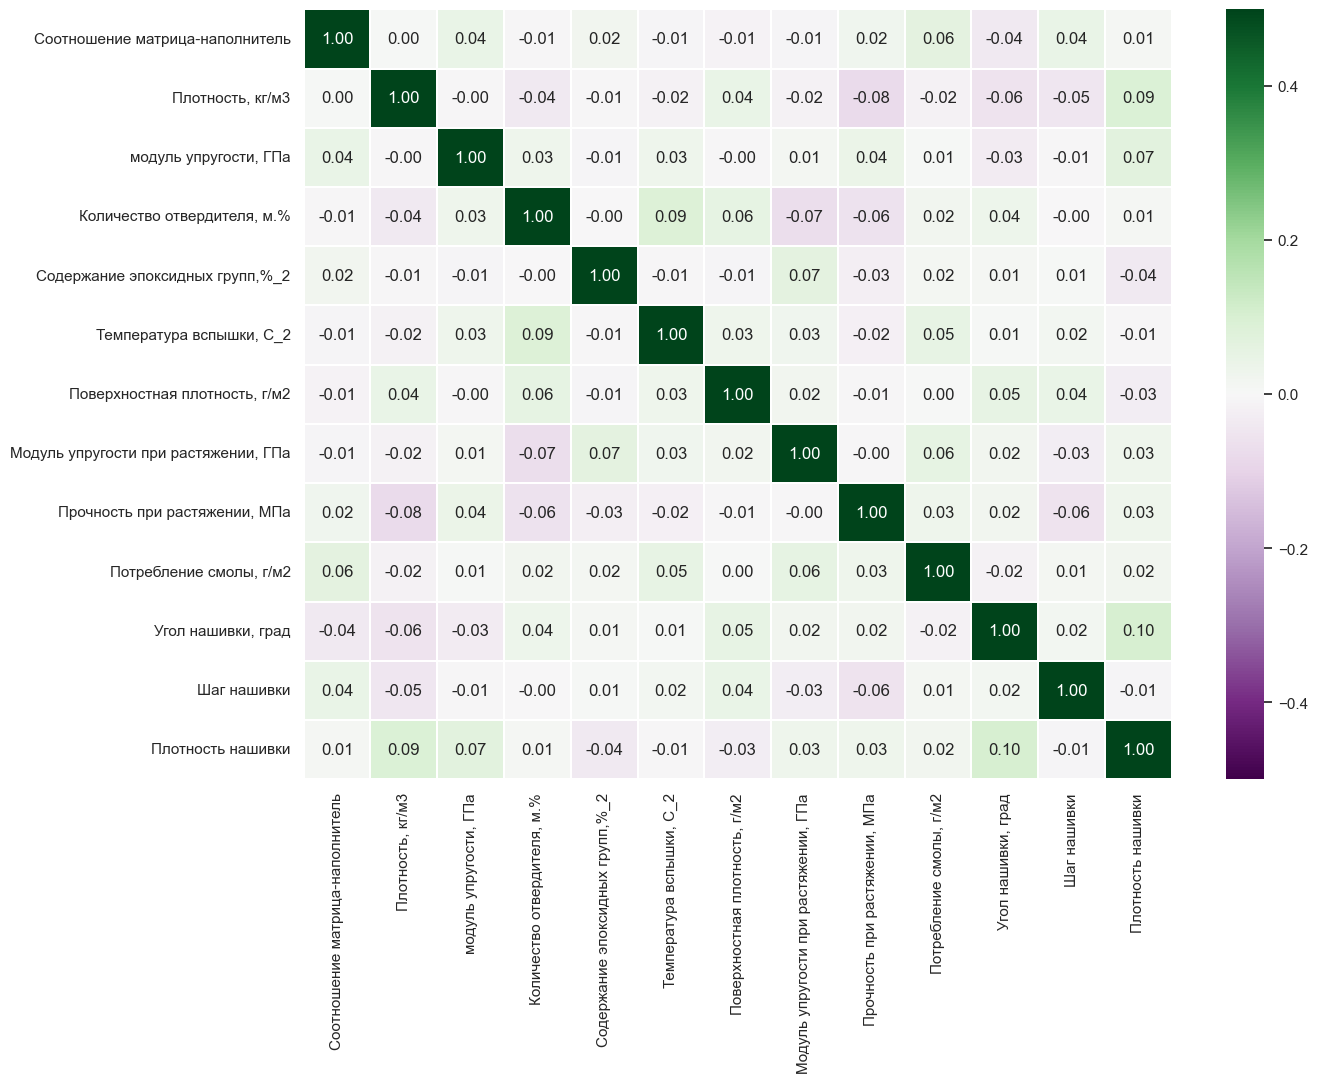

In [76]:
corr_matrix(df_encode_drop_norm)

<AxesSubplot: ylabel='Density'>

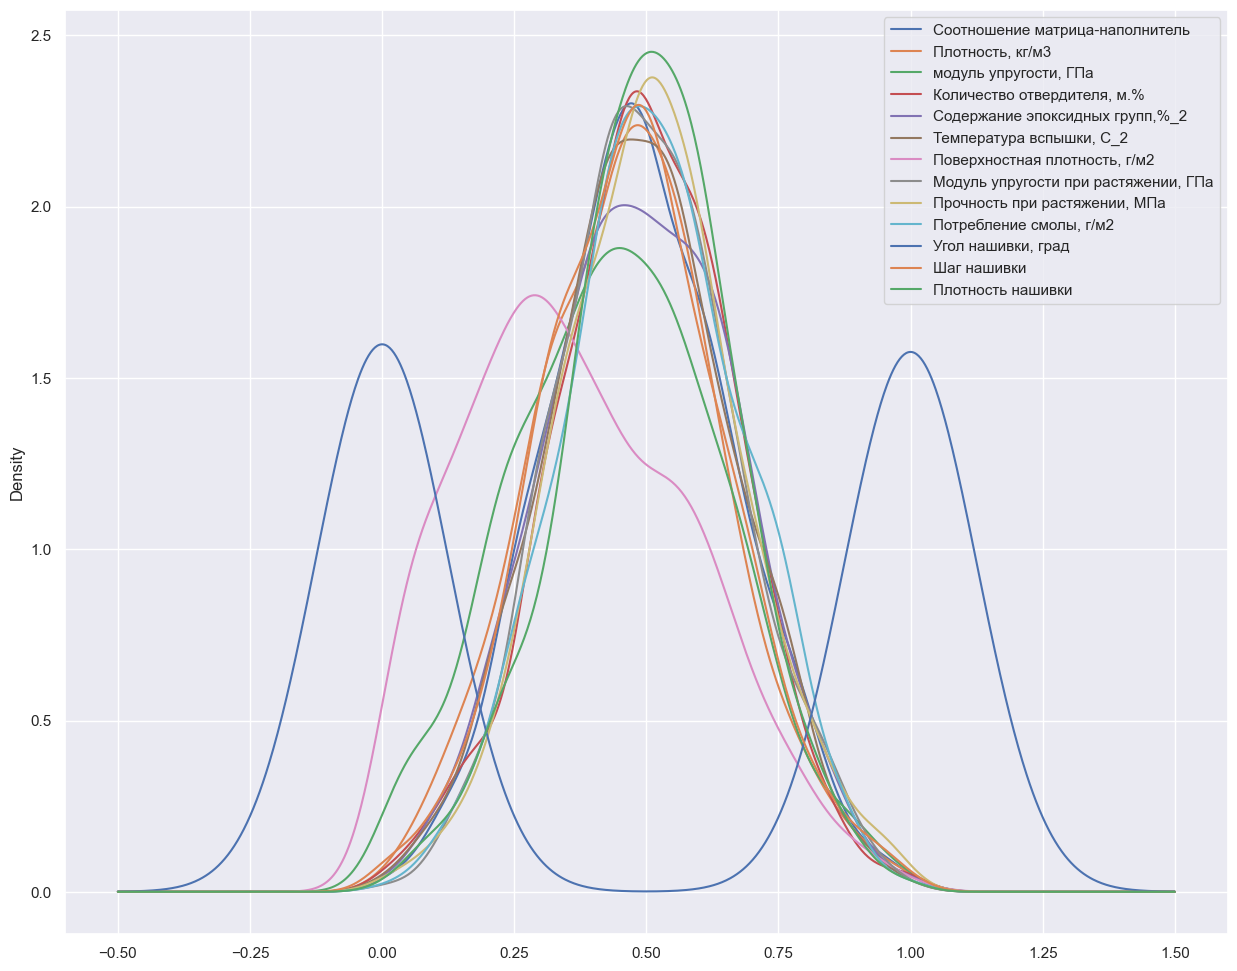

In [77]:
fig, ax = plt.subplots(figsize=(15, 12))
df_encode_drop_norm.plot(kind='kde', ax=ax)

Записываем предобработанные данные в csv для других ноутбуков

In [78]:
df_encode_drop_norm.to_csv('../data/interim/df_encode_drop_norm.csv', sep=';') #записываем промежуточные данные в csv
df_encode_drop.to_csv('../data/interim/df_encode_drop.csv', sep=';') #записываем промежуточные данные в csv
df_encode.to_csv('../data/interim/df_encode.csv', sep=';') #записываем промежуточные данные в csv
